In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes.txt', sep='\t', header=None).values[:, 1:]
training_labels = data[:,-1]
data = data[:,:-2]
print(training_labels.shape)
print(data.shape)

(768,)
(768, 8)


In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, training_labels, test_size = 0.5, stratify = training_labels)
train_acc_hist = []
test_acc_hist = []

In [4]:
%%time
for alpha in list(np.arange(0, 0.1, 0.001)):
    clf = GaussianNB(var_smoothing = alpha)
    clf = clf.fit(Xtrain, Ytrain)
    Ytest_pred = clf.predict(Xtest)
    Ytrain_pred = clf.predict(Xtrain)
    test_acc_hist.append(np.mean(Ytest==Ytest_pred))
    train_acc_hist.append(np.mean(Ytrain==Ytrain_pred))

CPU times: user 87.9 ms, sys: 0 ns, total: 87.9 ms
Wall time: 87.2 ms


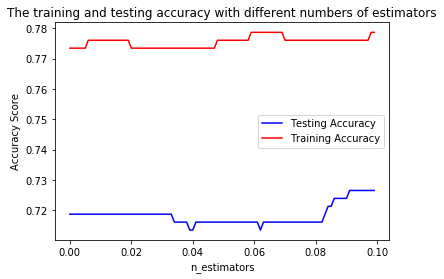

In [5]:
plt.ylabel('Accuracy Score')
plt.xlabel('n_estimators')
plt.title('The training and testing accuracy with different numbers of estimators')
plt.plot(list(np.arange(0, 0.1, 0.001)), test_acc_hist, 'b', label = "Testing Accuracy")
plt.plot(list(np.arange(0, 0.1, 0.001)), train_acc_hist, 'r', label = "Training Accuracy")
plt.legend()
plt.show()

In [6]:
print(np.argmax(test_acc_hist))

91


In [8]:
%%time
clf = GaussianNB(var_smoothing=0.091)
clf = clf.fit(Xtrain, Ytrain)
Ytest_pred = clf.predict(Xtest)
Ytrain_pred = clf.predict(Xtrain)
print("Train accuracy is %lf%%"%(np.mean(Ytrain==Ytrain_pred)))
print("Test accuracy is %lf%%"%(np.mean(Ytest_pred==Ytest)))

Train accuracy is 0.776042%
Test accuracy is 0.726562%
CPU times: user 5.47 ms, sys: 0 ns, total: 5.47 ms
Wall time: 4.03 ms
